In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import keras
import matplotlib.pyplot as plt
from datetime import datetime

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Import custom functions from other notebooks
sys.path.append("myfun/")
from ipynb.fs.full.myfun_nn import *
from ipynb.fs.full.myfun_model_nn import *
from ipynb.fs.full.myfun_model_linlog import *

2024-02-13 09:28:42.962032: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 09:28:42.962064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 09:28:42.962956: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 09:28:42.968517: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-13 09:28:43.960300: W tensorflow/compiler/tf2

# Comparing $v_0$ among all the NN models

In [2]:
ms2kmh = 3.6

flag_save = True

In [3]:
# Create the Output dir
if flag_save:
    
    ext = ".svg"
    
    # Create directory where to save the image
    now = datetime.now() 
    d = now.strftime(f"%Y-%m-%d_%H-%M-%S_v0comparison")
    
    path_save = 'out/' + d
    os.mkdir(path_save)

In [4]:
target_dir = "./out/"

for name in sorted(os.listdir(target_dir)):
    print(name)

2023-12-04_18-15-30_df8-9_15it_0.33ts
2023-12-08_18-44-13_df8-9_500it_0.33ts
2023-12-09_18-32-28_df1-2-3-4-5-6-7-8-9-10_1it-PRE-nn2
2023-12-09_18-40-50_df1-2-3-4-5-6-7-8-9-10_1it-PRE-nn2
2023-12-09_21-54-43_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2
2023-12-10_01-23-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4
2023-12-10_11-38-47_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10
2023-12-21_17-19-18_df1-2-3-4-5-6-7-8-9-10-PRE-LINLOG
2023-12-21_17-39-01_all
2023-12-21_17-41-28_500it-PRE-nn-all
2023-12-25_10-54-47_500it-PRE-nn-all
2024-02-08_20-26-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 2, 2, 1]
2024-02-08_21-08-01_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 1, 1, 1]
2024-02-08_22-07-40_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 2, 2, 2, 1]
2024-02-09_13-34-19_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 2, 2, 1]
2024-02-12_21-00-49_v0comparison
2024-02-13_03-43-15_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 1, 1, 1]
2024-02-13_09-28-45_v0comparison
old


## NN models

In [5]:
# Load the model
dir_nn2 = "2023-12-09_21-54-43_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2"
dir_nn4 = "2023-12-10_01-23-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4"
dir_nn10 = "2023-12-10_11-38-47_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10"

In [6]:
dir_all_nn = [dir_nn2, dir_nn4, dir_nn10]
namefile_info_nn = ["/info_nn2.txt", "/info_nn4.txt", "/info_nn10.txt"]
namefile_model_nn = ["/model_nn2.keras", "/model_nn4.keras", "/model_nn10.keras"]
DOE =[[1,2,1], [1,4,1], [1,10,1]] #Design of experiment

### Comparing all the models

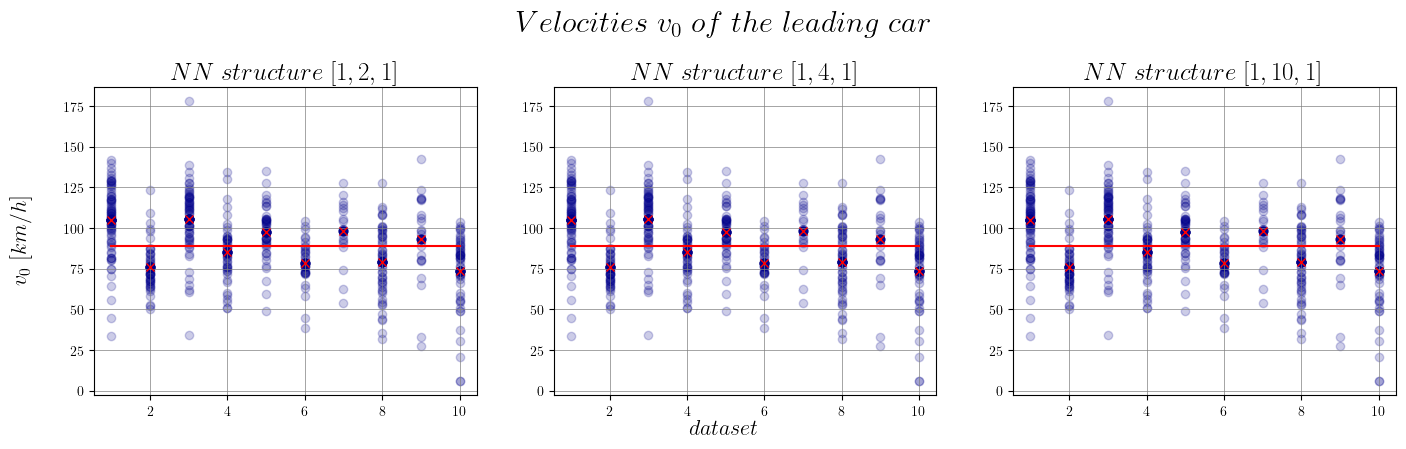

In [7]:
# Create a figure and axis for the plot
width, height = 21, 5
fig, axes = plt.subplots(1,3,figsize=(width*.8, height*.8))

for dir_nn, name_model, name_info, ax, d in zip(dir_all_nn, namefile_model_nn, namefile_info_nn, axes.ravel(),DOE):


    # Loading Model and info
    ## Model
    path = "./out/" + dir_nn
    model_nn = keras.models.load_model(path + name_model)
    ## info
    with open(path + name_info) as f:
        header = f.readline().split(sep=',')
    header[-1] = header[-1].split("\n")[0]
    info_dataset = pd.read_csv(path + name_info, sep=',', usecols= header)
    
    # 
    info_grouped = info_dataset.groupby(['N. file', 'type']).mean(numeric_only=True)
    info_grouped2 = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    info_avg = info_dataset.groupby(['type']).mean(numeric_only=True)

    # All the data
    ## For each scene, plot v0 mean
    for _, scn in info_dataset.iterrows():
        ax.scatter(scn['N. file'], scn['v0']*ms2kmh, alpha = .2, color = 'darkblue');

    ## For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    for nf, p in info_grouped2.iterrows():
        ax.plot(nf, p['v0']*ms2kmh, color = 'r', marker="x")

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_dataset.groupby('N. file')]
    v0_mean = np.mean([ infof['v0']*ms2kmh for _, infof in info_grouped.iterrows()]) 
    ax.plot(alldfs, [v0_mean]*len(alldfs), color = 'r')  

    # labeling
    ax.set_title(fr"$NN\ structure\ {str(d)}$",fontsize=18)
    ax.grid(color='grey', linestyle='-', linewidth=0.5);

    
fig.supxlabel(r"$data set$",fontsize=16, y=0.001)
fig.supylabel(r"$v_{0}\ [km/h]$",fontsize=16, x = 0.075)
plt.suptitle(fr"$Velocities\ v_{0}\ of\ the\ leading\ car$", fontsize=22, y=1.075)    
plt.show()

# Save figure
if flag_save:

    title = f"/old_nn_comparison"    
    fig.savefig(path_save+title+ext, bbox_inches='tight')

### Best $v_0$

In [8]:
best_idx = 2

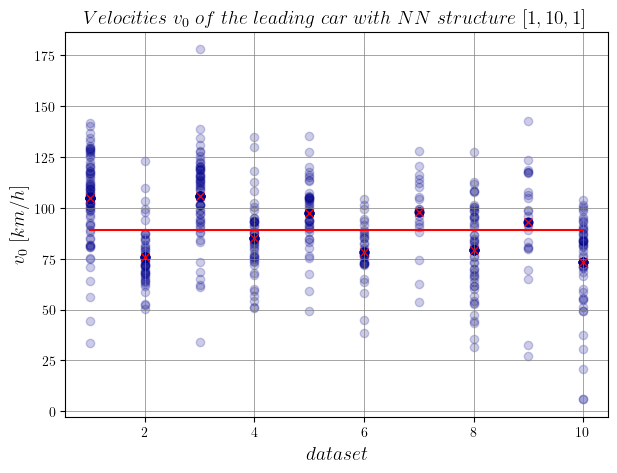

In [9]:
# Create a figure and axis for the plot
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width, height))


# Loading Model and info
dir_nn = dir_all_nn[best_idx]
name_model = namefile_model_nn[best_idx]
name_info = namefile_info_nn[best_idx]
d = DOE[best_idx]

## Model
path = "./out/" + dir_nn
model_nn = keras.models.load_model(path + name_model)
## info
with open(path + name_info) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]
info_dataset = pd.read_csv(path + name_info, sep=',', usecols= header)

# 
info_grouped = info_dataset.groupby(['N. file', 'type']).mean(numeric_only=True)
info_grouped2 = info_dataset.groupby(['N. file']).mean(numeric_only=True)
info_avg = info_dataset.groupby(['type']).mean(numeric_only=True)

# All the data
## For each scene, plot v0 mean
for _, scn in info_dataset.iterrows():
    ax.scatter(scn['N. file'], scn['v0']*ms2kmh, alpha = .2, color = 'darkblue');

## For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
for nf, p in info_grouped2.iterrows():
    ax.plot(nf, p['v0']*ms2kmh, color = 'r', marker="x")

# Plot v0 mean over all dfs
alldfs = [a for a, _ in info_dataset.groupby('N. file')]
v0_mean = np.mean([ infof['v0']*ms2kmh for _, infof in info_grouped.iterrows()]) 
ax.plot(alldfs, [v0_mean]*len(alldfs), color = 'r')  

# labeling
ax.set_title(fr"$NN\ structure\ {str(d)}$",fontsize=18)
ax.grid(color='grey', linestyle='-', linewidth=0.5);

ax.set_xlabel(r"$data set$",fontsize=14)
ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car\ with\ NN\ structure\ {str(d)}$",fontsize=14)
   
plt.show()

# Save figure
if flag_save:

    title = f"/old_nn_best"
    fig.savefig(path_save+title+ext, bbox_inches='tight')

## New NN models

In [10]:
# Load the model
dir1 = "2024-02-09_13-34-19_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 2, 2, 1]"
dir2 = "2024-02-13_03-43-15_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 1, 1, 1]"
dir3 = "2024-02-08_22-07-40_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 2, 2, 2, 1]"

In [11]:
dir_newnn = [dir1, dir2, dir3]
name_model_newnn = ["/model_nn.keras"]*len(dir_newnn)
name_info_newnn = ["/info_nn.txt"]*len(dir_newnn)
DOE_newnn =[[1,2,2,1], [1,1,1,1], [1,2,2,2,1]] #Design of experiment

### Comparing all the models

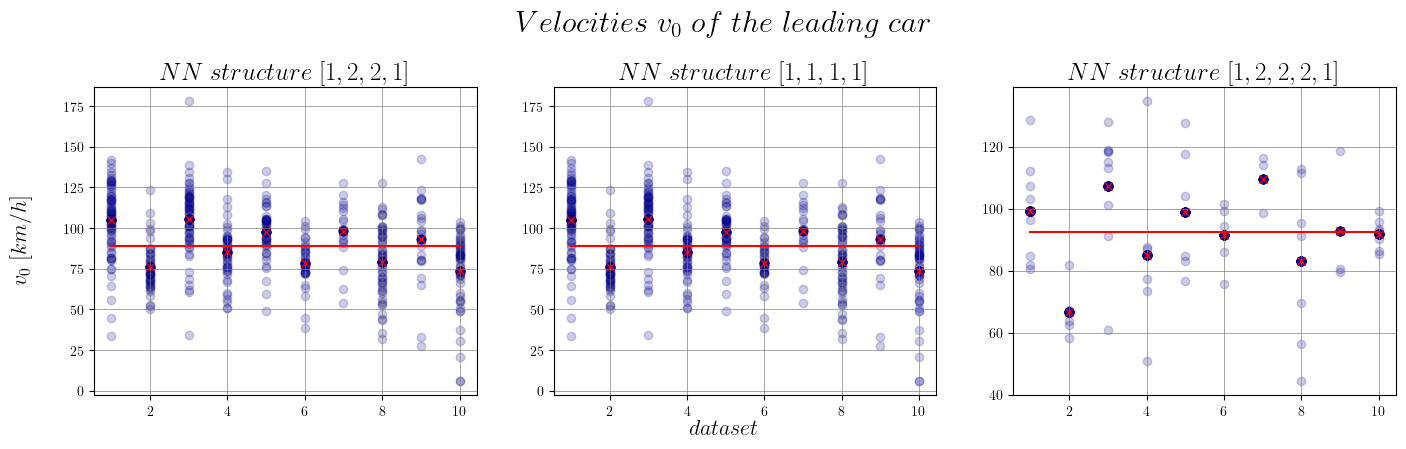

In [12]:
# Create a figure and axis for the plot
width, height = 21, 5
fig, axes = plt.subplots(1,3,figsize=(width*.8, height*.8))

for dir_nn, name_model, name_info, ax, d in zip(dir_newnn, name_model_newnn, name_info_newnn, axes.ravel(),DOE_newnn):

    # Loading Model and info
    ## Model
    path = "./out/" + dir_nn
    model_nn = keras.models.load_model(path + name_model)
    ## info
    with open(path + name_info) as f:
        header = f.readline().split(sep=',')
    header[-1] = header[-1].split("\n")[0]
        
    info_dataset = pd.read_csv(path + name_info, sep=',', usecols= header)
    
    # 
    info_grouped = info_dataset.groupby(['N. file', 'type']).mean(numeric_only=True)
    info_grouped2 = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    info_avg = info_dataset.groupby(['type']).mean(numeric_only=True)

    # All the data
    ## For each scene, plot v0 mean
    for _, scn in info_dataset.iterrows():
        ax.scatter(scn['N. file'], scn['v0']*ms2kmh, alpha = .2, color = 'darkblue');

    ## For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    for nf, p in info_grouped2.iterrows():
        ax.plot(nf, p['v0']*ms2kmh, color = 'r', marker="x")

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_dataset.groupby('N. file')]
    v0_mean = np.mean([ infof['v0']*ms2kmh for _, infof in info_grouped.iterrows()]) 
    ax.plot(alldfs, [v0_mean]*len(alldfs), color = 'r')  

    # labeling
    ax.set_title(fr"$NN\ structure\ {str(d)}$",fontsize=18)
    ax.grid(color='grey', linestyle='-', linewidth=0.5);

    
fig.supxlabel(r"$data set$",fontsize=16, y=0.001)
fig.supylabel(r"$v_{0}\ [km/h]$",fontsize=16, x = 0.075)
plt.suptitle(fr"$Velocities\ v_{0}\ of\ the\ leading\ car$", fontsize=22, y=1.075)    
plt.show()

# Save figure
if flag_save:

    title = f"/new_nn_comparison"
    fig.savefig(path_save+title+ext, bbox_inches='tight')

### Best $v_0$

In [13]:
best_new_idx = 0

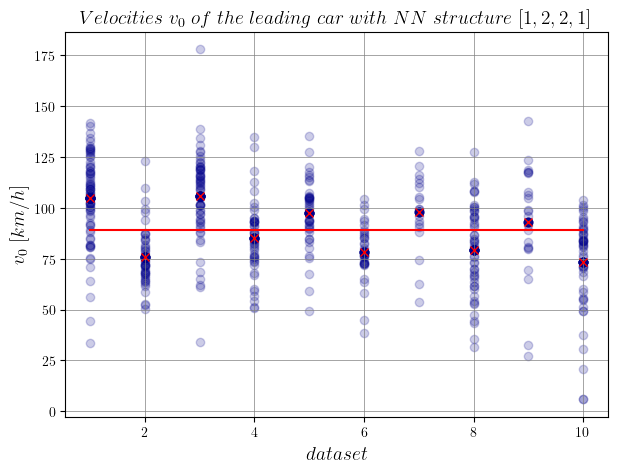

In [14]:
# Create a figure and axis for the plot
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width, height))


# Loading Model and info
dir_nn = dir_newnn[best_new_idx]
name_model = name_model_newnn[best_new_idx]
name_info = name_info_newnn[best_new_idx]
d = DOE_newnn[best_new_idx]
## Model
path = "./out/" + dir_nn
model_nn = keras.models.load_model(path + name_model)
## info
with open(path + name_info) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]
info_dataset = pd.read_csv(path + name_info, sep=',', usecols= header)

# 
info_grouped = info_dataset.groupby(['N. file', 'type']).mean(numeric_only=True)
info_grouped2 = info_dataset.groupby(['N. file']).mean(numeric_only=True)
info_avg = info_dataset.groupby(['type']).mean(numeric_only=True)

# All the data
## For each scene, plot v0 mean
for _, scn in info_dataset.iterrows():
    ax.scatter(scn['N. file'], scn['v0']*ms2kmh, alpha = .2, color = 'darkblue');

## For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
for nf, p in info_grouped2.iterrows():
    ax.plot(nf, p['v0']*ms2kmh, color = 'r', marker="x")

# Plot v0 mean over all dfs
alldfs = [a for a, _ in info_dataset.groupby('N. file')]
v0_mean = np.mean([ infof['v0']*ms2kmh for _, infof in info_grouped.iterrows()]) 
ax.plot(alldfs, [v0_mean]*len(alldfs), color = 'r')  

# labeling
ax.set_xlabel(r"$data set$",fontsize=14)
ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car\ with\ NN\ structure\ {str(d)}$",fontsize=14)
ax.grid(color='grey', linestyle='-', linewidth=0.5);

plt.show()

# Save figure
if flag_save:

    title = f"/new_nn_best"
    fig.savefig(path_save+title+ext, bbox_inches='tight')

## Together

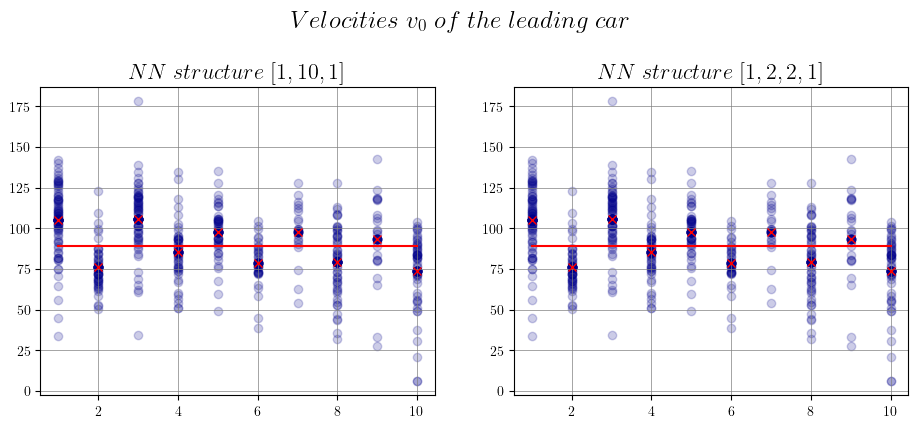

In [15]:
# Create a figure and axis for the plot
width, height = 7*2, 5
fig, axes = plt.subplots(1,2, figsize=(width*.8, height*.8))

dir_list = [dir_all_nn[best_idx], dir_newnn[best_new_idx]]
name_model_list = [namefile_model_nn[best_idx], name_model_newnn[best_new_idx]]
name_info_list = [namefile_info_nn[best_idx], name_info_newnn[best_new_idx]]
does = [DOE[best_idx], DOE_newnn[best_new_idx]]

for dir_nn, name_model, name_info, ax, d in zip(dir_list, name_model_list, name_info_list, axes.ravel(),does):

    # Loading Model and info
    ## Model
    path = "./out/" + dir_nn
    model_nn = keras.models.load_model(path + name_model)
    ## info
    with open(path + name_info) as f:
        header = f.readline().split(sep=',')
    header[-1] = header[-1].split("\n")[0]
    info_dataset = pd.read_csv(path + name_info, sep=',', usecols= header)

    # 
    info_grouped = info_dataset.groupby(['N. file', 'type']).mean(numeric_only=True)
    info_grouped2 = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    info_avg = info_dataset.groupby(['type']).mean(numeric_only=True)

    # All the data
    ## For each scene, plot v0 mean
    for _, scn in info_dataset.iterrows():
        ax.scatter(scn['N. file'], scn['v0']*ms2kmh, alpha = .2, color = 'darkblue');

    ## For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    for nf, p in info_grouped2.iterrows():
        ax.plot(nf, p['v0']*ms2kmh, color = 'r', marker="x")

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_dataset.groupby('N. file')]
    v0_mean = np.mean([ infof['v0']*ms2kmh for _, infof in info_grouped.iterrows()]) 
    ax.plot(alldfs, [v0_mean]*len(alldfs), color = 'r')  

    # labeling
    ax.set_title(fr"$NN\ structure\ {str(d)}$",fontsize=16)
    ax.grid(color='grey', linestyle='-', linewidth=0.5);

# ax.set_xlabel(r"$data set$",fontsize=14)
# ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
plt.suptitle(fr"$Velocities\ v_{0}\ of\ the\ leading\ car$", fontsize=18, y=1.075)    
plt.show()

# Save figure
if flag_save:

    title = f"/best_comparison"
    fig.savefig(path_save+title+ext, bbox_inches='tight')